In [81]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('top_insta_influencers_data.csv', encoding='UTF-8-SIG')

# Display the first few rows
print(df.head())


   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  


"Unveiling Trends in Instagram Influencer Data: An Exploratory Analysis"


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


## Data Cleaning

In [83]:
# Function to handle conversion with 'k', 'm', 'b' notation
def convert_to_numeric(column):
    return pd.to_numeric(column.str.replace('k', 'e3')
                                .str.replace('m', 'e6')
                                .str.replace('b', 'e9')
                                .str.replace(',', ''), errors='coerce')

# Apply the conversion function to relevant columns in one line
df[numeric_columns] = df[numeric_columns].apply(convert_to_numeric)

# Convert '60_day_eng_rate' to float after removing the '%' sign
df['60_day_eng_rate'] = pd.to_numeric(df['60_day_eng_rate'].str.replace('%', ''), errors='coerce') / 100



In [84]:
# Check for missing values
df.fillna('Unknown', inplace=True)



<ipython-input-84-9672f7524154>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)


In [85]:
#Display the clean Dataset
df.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,0.0139,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,0.0162,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,0.0124,4400000.0,6.000000e+09,Unknown
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.0097,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.002,665300.0,1.250000e+10,United States


### Top 10 Influencers with the Highest Follower Counts


<ipython-input-64-92aa03e75100>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='followers', y='channel_info', data=top_10_followers, palette='viridis')


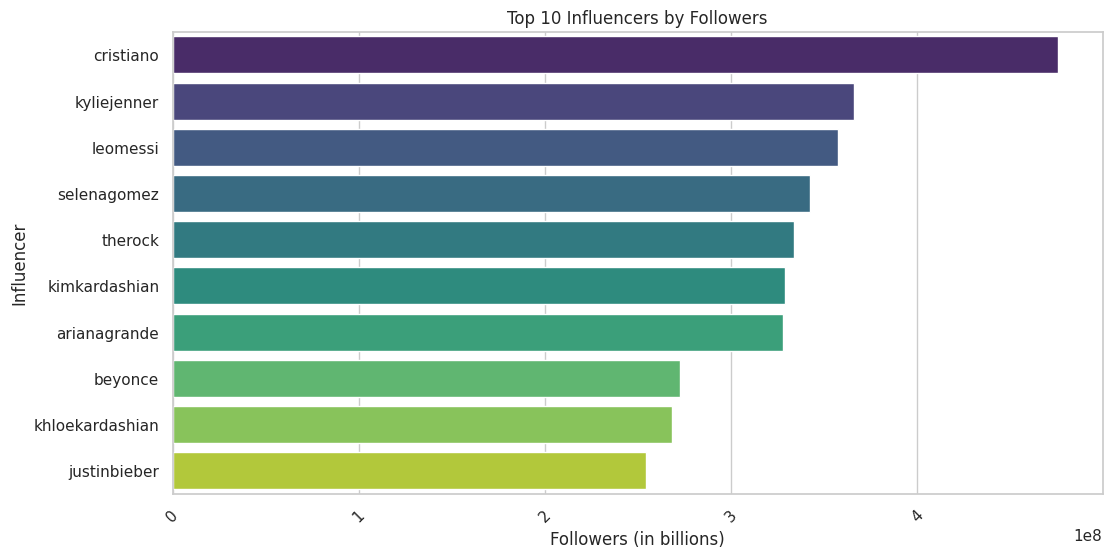

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Top 10 Influencers by Followers
plt.figure(figsize=(12, 6))
top_10_followers = df.nlargest(10, 'followers')
sns.barplot(x='followers', y='channel_info', data=top_10_followers, palette='viridis')
plt.title('Top 10 Influencers by Followers')
plt.xlabel('Followers (in billions)')
plt.ylabel('Influencer')
plt.xticks(rotation=45)
plt.show()

### Check data types and unique values in specified columns


In [65]:

# Data types of each column
data_types = df.dtypes

# Unique values for 'followers', '60_day_eng_rate', and 'country'
unique_values = {
    'followers': df['followers'].unique(),
    '60_day_eng_rate': df['60_day_eng_rate'].unique(),
    'country': df['country'].unique()
}

# Output data types and unique values
print("Data Types:\n", data_types)
print("\nUnique values for 'followers':", unique_values['followers'])
print("\nUnique values for '60_day_eng_rate':", unique_values['60_day_eng_rate'])
print("\nUnique values for 'country':", unique_values['country'])


Data Types:
 rank                   int64
channel_info          object
influence_score        int64
posts                float64
followers            float64
avg_likes            float64
60_day_eng_rate       object
new_post_avg_like    float64
total_likes          float64
country               object
dtype: object

Unique values for 'followers': [4.758e+08 3.662e+08 3.573e+08 3.427e+08 3.341e+08 3.292e+08 3.277e+08
 2.728e+08 2.683e+08 2.545e+08 2.540e+08 2.370e+08 2.341e+08 2.222e+08
 2.204e+08 2.118e+08 2.016e+08 1.952e+08 1.815e+08 1.771e+08 1.703e+08
 1.520e+08 1.507e+08 1.405e+08 1.391e+08 1.353e+08 1.309e+08 1.251e+08
 1.234e+08 1.196e+08 1.185e+08 1.114e+08 1.052e+08 8.590e+07 8.560e+07
 8.230e+07 8.130e+07 8.110e+07 8.090e+07 7.610e+07 7.530e+07 7.490e+07
 7.390e+07 7.320e+07 7.270e+07 7.040e+07 7.010e+07 6.990e+07 6.890e+07
 6.870e+07 6.840e+07 6.770e+07 6.730e+07 6.690e+07 6.630e+07 6.620e+07
 6.590e+07 6.500e+07 6.390e+07 6.350e+07 6.310e+07 6.290e+07 6.280e+07
 6.270e+07 6

###Comparing Engagement Rates Across the Top 10 Countries



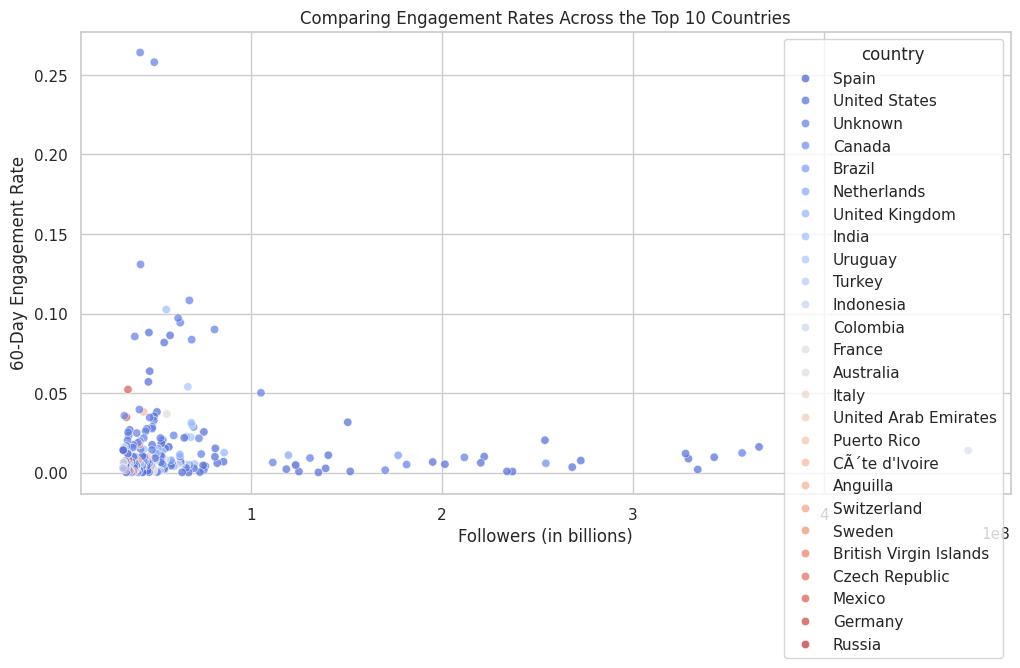

In [86]:
# Replace 'Unknown' in '60_day_eng_rate' with NaN
# Then drop these rows for the purpose of visualization
df['60_day_eng_rate'] = pd.to_numeric(df['60_day_eng_rate'], errors='coerce')

# Drop rows with NaN values in 'followers' or '60_day_eng_rate'
df_cleaned = df.dropna(subset=['followers', '60_day_eng_rate'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='followers', y='60_day_eng_rate', data=df_cleaned, hue='country', palette='coolwarm',color='teal', alpha=0.7)
plt.title("Comparing Engagement Rates Across the Top 10 Countries")
plt.xlabel('Followers (in billions)')
plt.ylabel('60-Day Engagement Rate')
plt.show()



### Distribution of Influencer Scores


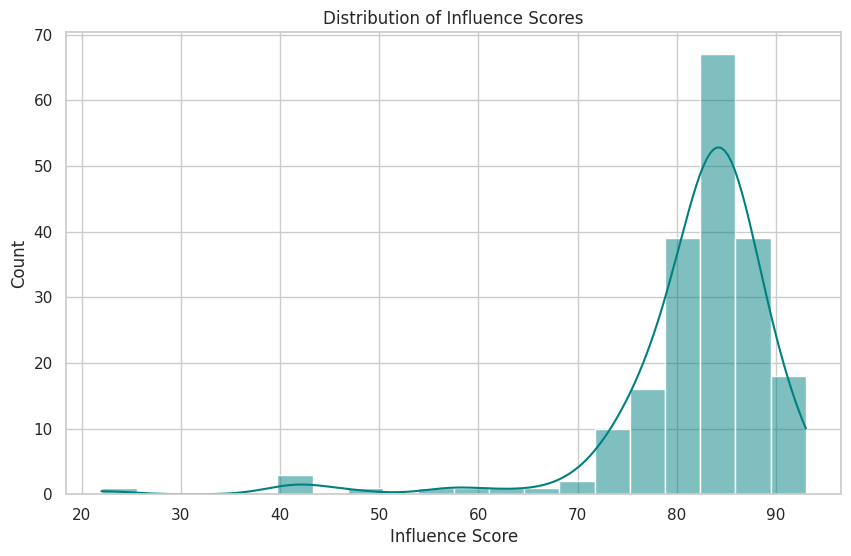

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(df['influence_score'], bins=20, kde=True,color='teal')
plt.title('Distribution of Influence Scores')
plt.xlabel('Influence Score')
plt.ylabel('Count')
plt.show()


### Relationship Between Posts and Total Likes

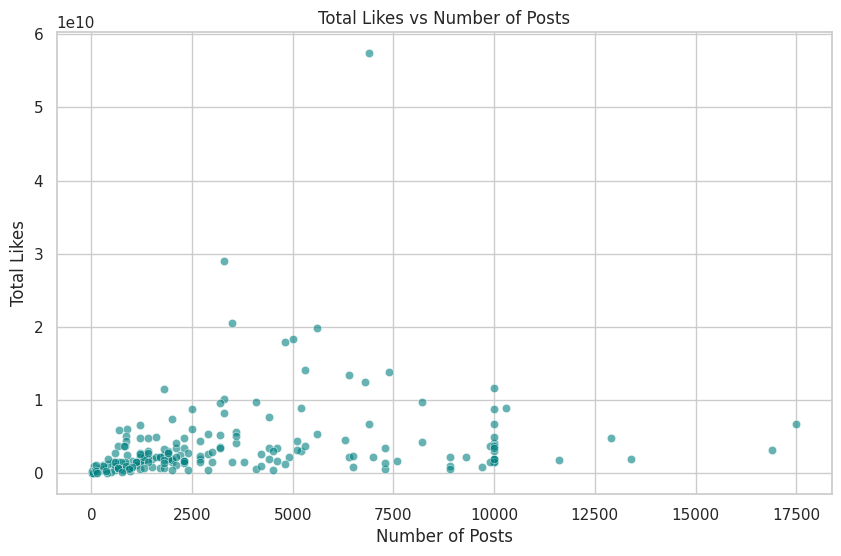

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='posts', y='total_likes', data=df, alpha=0.6,color='teal')
plt.title('Total Likes vs Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Total Likes')
plt.show()


### Influencers with the Most Total Likes


<ipython-input-89-c9de67b1380d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_likes', y='channel_info', data=top_likes,palette='viridis')


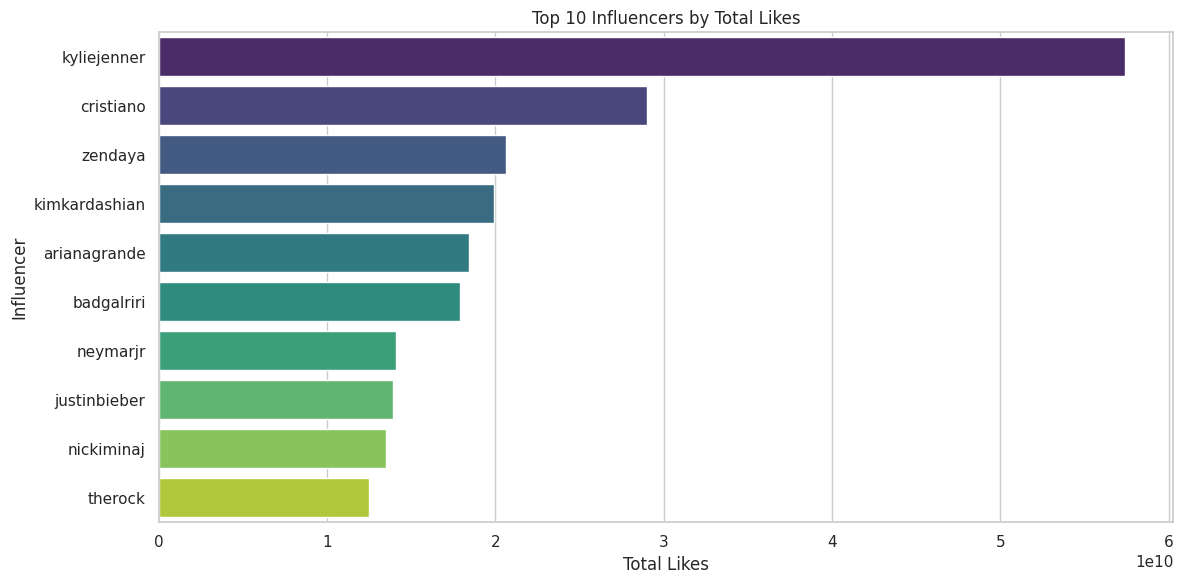

In [89]:

top_likes = df.nlargest(10, 'total_likes')
plt.figure(figsize=(12, 6))
sns.barplot(x='total_likes', y='channel_info', data=top_likes,palette='viridis')
plt.title('Top 10 Influencers by Total Likes')
plt.xlabel('Total Likes')
plt.ylabel('Influencer')
plt.tight_layout()
plt.show()


### Fastest Growing Influencers (based on 60_day_eng_rate):

<ipython-input-90-316fa66081c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='60_day_eng_rate', y='channel_info', data=top_growth, palette='viridis')


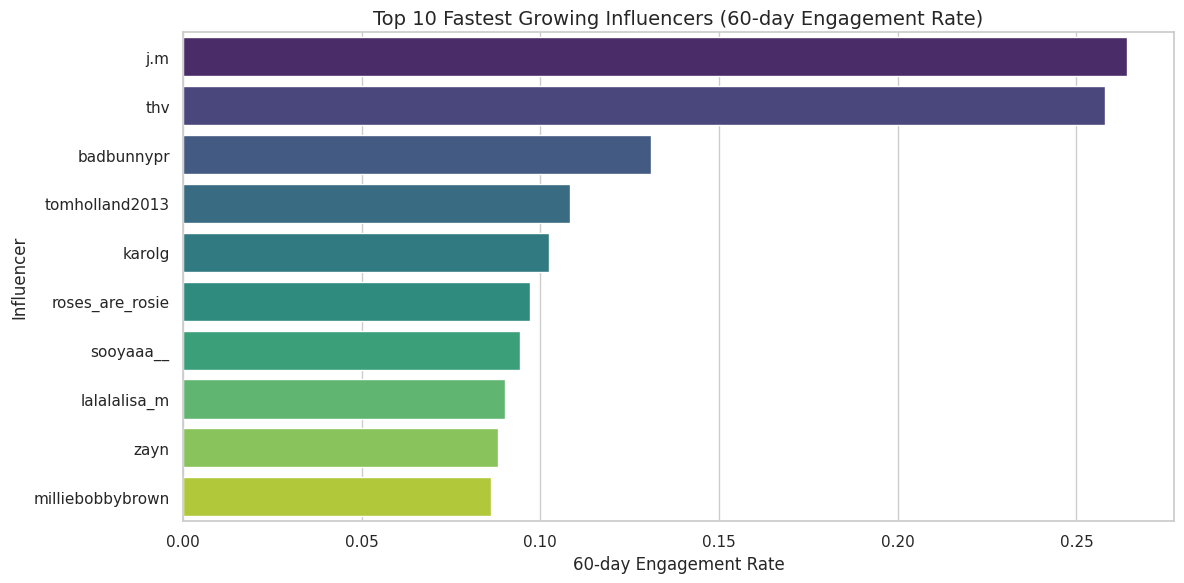

In [90]:
top_growth = df.nlargest(10, '60_day_eng_rate')
plt.figure(figsize=(12, 6))
sns.barplot(x='60_day_eng_rate', y='channel_info', data=top_growth, palette='viridis')
plt.title('Top 10 Fastest Growing Influencers (60-day Engagement Rate)', fontsize=14)
plt.xlabel('60-day Engagement Rate', fontsize=12)
plt.ylabel('Influencer', fontsize=12)
plt.tight_layout()
plt.show()


### Top 10 Countries by Number of Influencers

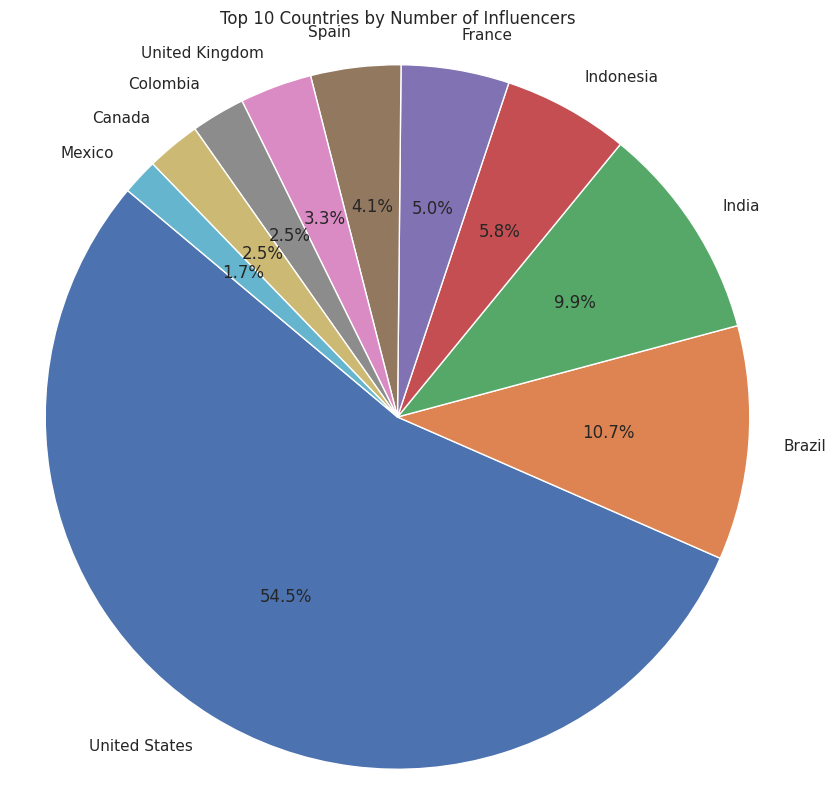

In [99]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 10))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries by Number of Influencers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
